#E-Commerce Shipping Data

Data Resource : https://www.kaggle.com/prachi13/customer-analytics


#Basic Information

ID: ID Number of Customers.

Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.

Weight in gms: It is the weight in grams.

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


#Target

What was Customer Rating? And was the product delivered on time?

Is Customer query is being answered?

If Product importance is high. having higest rating or being delivered on time?


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Train.csv')

In [8]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [9]:
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [10]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#Exploratory Data Analysis

In the plots, we can find out 2 imporatant information.

1. There are no products more than 10% discount reached on time.

2. None of the products weighing 2-4kg reached on time.


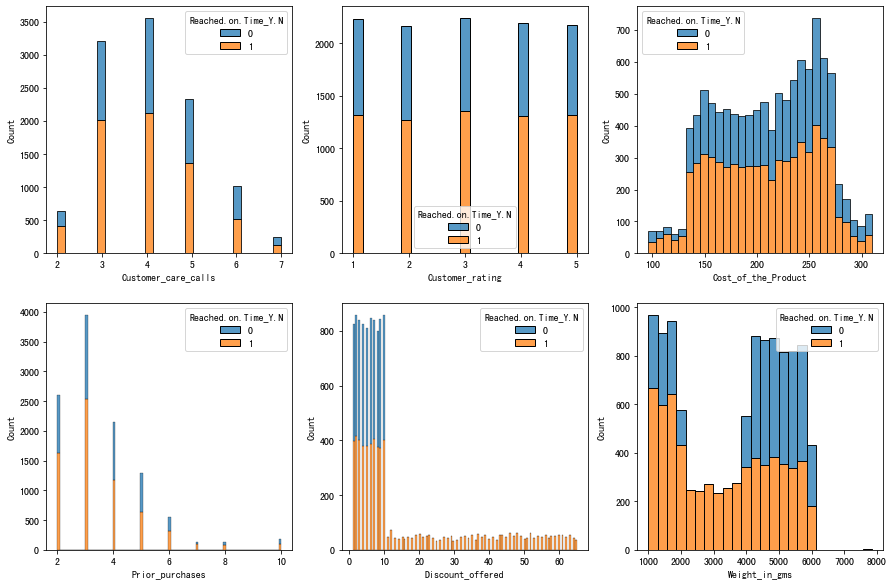

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
n = 0
attr = df.describe().columns.to_list()[1:-1]

for i in range(2):
    for j in range(3):
        axes = ax[i][j]
        sns.histplot(ax=axes, data=df, x=attr[n], hue='Reached.on.Time_Y.N',multiple="stack")
        n+=1

plt.show()

In the plots, we can find out 2 imporatant information.

1. Ship is the most common type of shipment.

2. High imporantance product is less than 10%


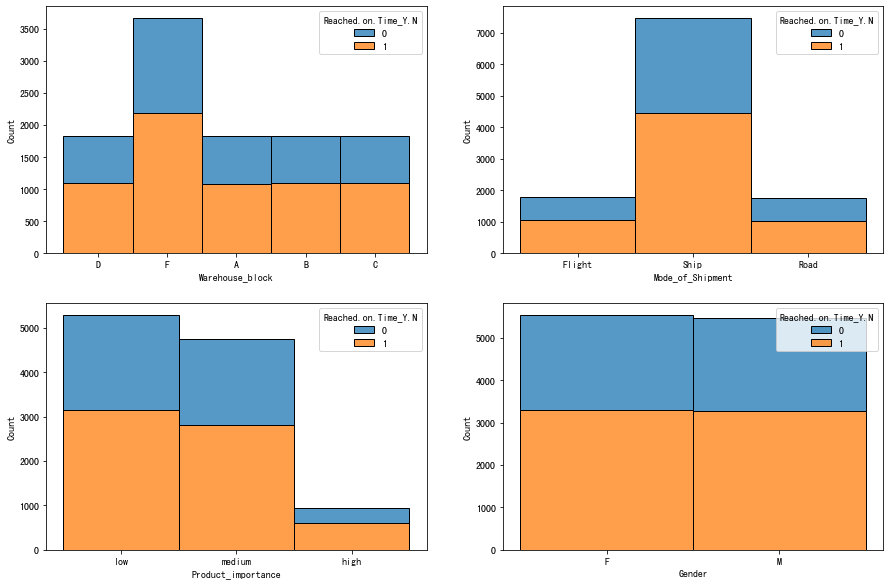

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
n = 0
other = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

for i in range(2):
    for j in range(2):
        axes = ax[i][j]
        sns.histplot(ax=axes, data=df, x=other[n], hue='Reached.on.Time_Y.N',multiple="stack")
        n+=1

plt.show()

In [13]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


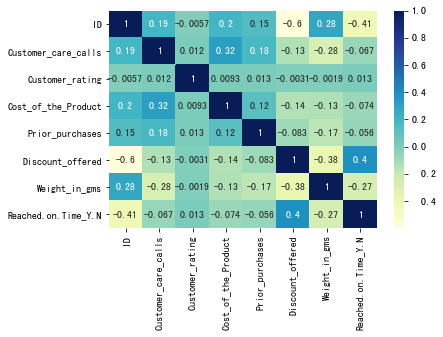

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [15]:
# Changing Categorial columns to numbers
df['Warehouse_block']=df['Warehouse_block'].replace({'A':0,'B':1,'C':2,'D':3,'F':4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].replace({'Flight':0, 'Ship':1, 'Road':2})
df['Product_importance'] = df['Product_importance'].replace({'low':0,'medium':1,'high':2})
df['Gender'] = df['Gender'].replace({'F':0,'M':1})

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [13]:
train = df.iloc[:,:-1]
test = df.iloc[:,-1]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(train,test, test_size=0.2, random_state=6)

In [15]:
#LogisticRegression

In [16]:
lr = LogisticRegression()
lr.fit(x_train,y_train.values.ravel())
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       873
           1       0.75      0.70      0.72      1327

    accuracy                           0.68      2200
   macro avg       0.66      0.67      0.67      2200
weighted avg       0.68      0.68      0.68      2200



In [17]:
#DecisionTreeClassifier

In [18]:
DT = DecisionTreeClassifier(max_depth=10)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.91      0.70       873
           1       0.90      0.54      0.68      1327

    accuracy                           0.69      2200
   macro avg       0.73      0.73      0.69      2200
weighted avg       0.77      0.69      0.68      2200



In [19]:
#RandomForestClassifier

In [20]:
rf = RandomForestClassifier(random_state=4)
param_grid = {'max_depth':range(3,10),'criterion':['gini','entropy']}
model_rf = GridSearchCV(rf, param_grid=param_grid)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.99      0.72       873
           1       0.99      0.49      0.66      1327

    accuracy                           0.69      2200
   macro avg       0.78      0.74      0.69      2200
weighted avg       0.82      0.69      0.68      2200



In [21]:
#SVC(kernel="linear", C=0.025)

In [22]:
sv =  SVC(kernel="linear", C=0.025)
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       873
           1       0.81      0.62      0.70      1327

    accuracy                           0.68      2200
   macro avg       0.69      0.70      0.68      2200
weighted avg       0.72      0.68      0.69      2200



In [23]:
#SVC(gamma=2, C=1)

In [26]:
sv2 =  SVC(gamma=2, C=1)
sv2.fit(x_train, y_train)
y_pred = sv2.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       873
           1       0.60      1.00      0.75      1327

    accuracy                           0.60      2200
   macro avg       0.30      0.50      0.38      2200
weighted avg       0.36      0.60      0.45      2200

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6031818181818182

In [44]:
model = [lr, DT, model_rf, sv, sv2]
model_name = ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine(LINEAR)','Support Vector Machine(RBF)']
print('Model Accuracy Rate')
print('-------------------')
for i in range(len(model)):
    print(f'{model_name[i]} : {round(model[i].score(x_test,y_test)*100,2)}%')
print('-------------------')

Model Accuracy Rate
-------------------
Logistic Regression : 67.55%
Decision Tree : 68.68%
Random Forest : 69.14%
Support Vector Machine(LINEAR) : 68.36%
Support Vector Machine(RBF) : 60.32%
-------------------


#Conclusion

1. IF the product "weighing 2-4kg" OR " > 10% discount", it will not reach on time.

2. I'll choose "Random Forest Model" to predict whether a given shipment will arrive on time.